In [63]:
from sklearn.model_selection import train_test_split
from pyspark.ml.classification import LogisticRegression ,RandomForestClassifier ,LinearSVC
from pyspark.sql import SparkSession
from pyspark.ml.evaluation import BinaryClassificationEvaluator 
from pyspark.mllib.evaluation import BinaryClassificationMetrics
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import SQLContext
from pyspark import SparkContext
from pyspark.ml.feature import OneHotEncoder
from pyspark.ml.feature import StringIndexer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pyspark import SparkConf
from scipy.stats import chi2_contingency
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy import stats

In [2]:
new_df=pd.read_csv('data/output.csv')

In [3]:
states=new_df["state"].value_counts() / len(new_df["state"])

failed        0.593861
successful    0.406139
Name: state, dtype: float64


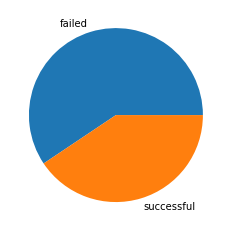

In [4]:
print(states)
plt.pie(list(states.values) , labels = list(states.index))
plt.show()

Text(0.5, 0, 'Number of campaigns')

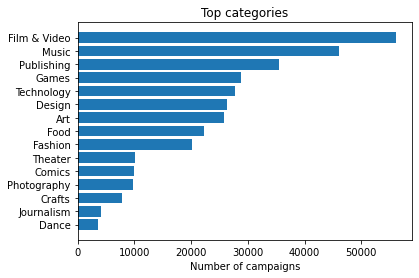

In [5]:
x = new_df.main_category.value_counts().index.tolist()
y = new_df.main_category.value_counts()
plt.yticks(np.arange(len(x)),x)
plt.gca().invert_yaxis() 
plt.barh(np.arange(len(x)),y)
plt.title('Top categories')
plt.xlabel('Number of campaigns')

Text(0.5, 0, 'Number of campaigns')

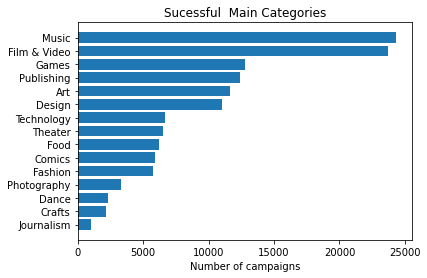

In [6]:
values = new_df.loc[new_df.state=='successful','main_category'].value_counts()
x = values.index.tolist()
y = values
plt.yticks(np.arange(len(x)),x)
plt.gca().invert_yaxis() 
plt.barh(np.arange(len(x)),y)
plt.title('Sucessful  Main Categories')
plt.xlabel('Number of campaigns')

Text(0.5, 0, 'Number of campaigns')

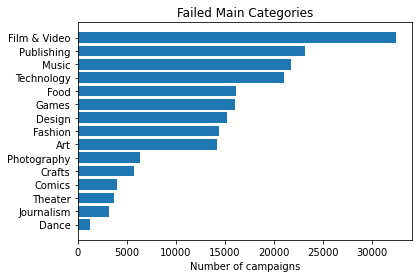

In [7]:
values = new_df.loc[new_df.state=='failed','main_category'].value_counts()
x = values.index.tolist()
y = values
plt.yticks(np.arange(len(x)),x)
plt.gca().invert_yaxis() 
plt.barh(np.arange(len(x)),y)
plt.title('Failed Main Categories')
plt.xlabel('Number of campaigns')

Text(0.5, 1.0, 'Average USD Pledged Among Failed Campaigns')

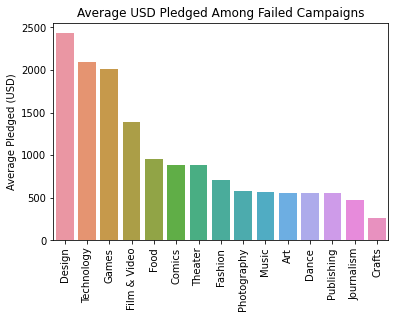

In [8]:
successful = new_df.loc[(new_df.state == 'failed')]
groupby_main_category = successful.groupby(['main_category']).mean()
mean= pd.DataFrame(groupby_main_category['usd pledged']).reset_index()
mean_ord=mean.sort_values(by="usd pledged",ascending=False)

x=mean.main_category
y=mean['usd pledged']
figz=sns.barplot(x="main_category", y="usd pledged" , data=mean_ord)
figz.set(xlabel='', ylabel='Average Pledged (USD)')
figz.set_xticklabels(figz.get_xticklabels(),rotation=90)
figz.set_title('Average USD Pledged Among Failed Campaigns')


Text(0.5, 1.0, 'Average USD Pledged Among Successful Campaigns')

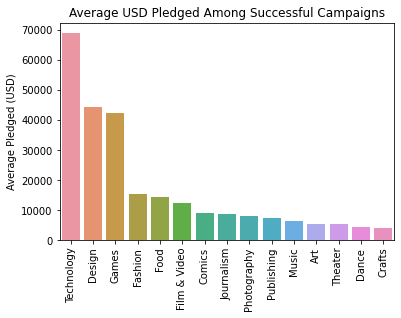

In [9]:


successful = new_df.loc[(new_df.state == 'successful')]
groupby_main_category = successful.groupby(['main_category']).mean()
mean= pd.DataFrame(groupby_main_category['usd pledged']).reset_index()
mean_ord=mean.sort_values(by="usd pledged",ascending=False)

x=mean.main_category
y=mean['usd pledged']
figz=sns.barplot(x="main_category", y="usd pledged" , data=mean_ord)
figz.set(xlabel='', ylabel='Average Pledged (USD)')
figz.set_xticklabels(figz.get_xticklabels(),rotation=90)
figz.set_title('Average USD Pledged Among Successful Campaigns')



Text(0.5, 1.0, 'Average goal Among Failed Campaigns')

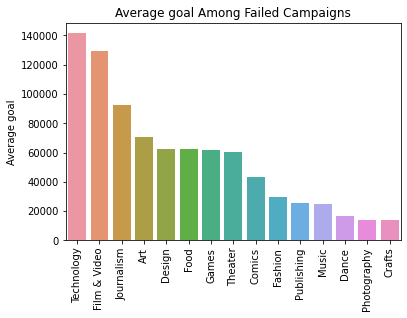

In [10]:
failed = new_df.loc[(new_df.state == 'failed')]
groupby_main_category = failed.groupby(['main_category']).mean()
mean= pd.DataFrame(groupby_main_category['goal']).reset_index()
mean_ord=mean.sort_values(by="goal",ascending=False)

x=mean.main_category
y=mean['goal']
figz=sns.barplot(x="main_category", y="goal" , data=mean_ord)
figz.set(xlabel='', ylabel='Average goal')
figz.set_xticklabels(figz.get_xticklabels(),rotation=90)
figz.set_title('Average goal Among Failed Campaigns')

Text(0.5, 1.0, 'Average goal Among successful Campaigns')

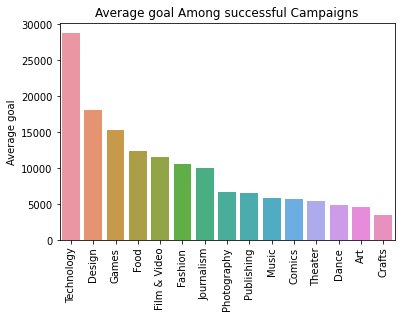

In [11]:
successful = new_df.loc[(new_df.state == 'successful')]
groupby_main_category = successful.groupby(['main_category']).mean()
mean= pd.DataFrame(groupby_main_category['goal']).reset_index()
mean_ord=mean.sort_values(by="goal",ascending=False)

x=mean.main_category
y=mean['goal']
figz=sns.barplot(x="main_category", y="goal" , data=mean_ord)
figz.set(xlabel='', ylabel='Average goal')
figz.set_xticklabels(figz.get_xticklabels(),rotation=90)
figz.set_title('Average goal Among successful Campaigns')

Text(0.5, 1.0, 'Count backers Among successful Campaigns')

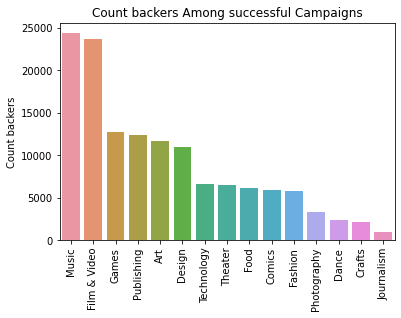

In [12]:
successful = new_df.loc[(new_df.state == 'successful')]
groupby_main_category = successful.groupby(['main_category']).count()
count_value= pd.DataFrame(groupby_main_category['backers']).reset_index()
count_ord=count_value.sort_values(by="backers",ascending=False)

x=count_value.main_category
y=count_value['backers']
figz=sns.barplot(x="main_category", y="backers" , data=count_ord)
figz.set(xlabel='', ylabel='Count backers')
figz.set_xticklabels(figz.get_xticklabels(),rotation=90)
figz.set_title('Count backers Among successful Campaigns')

Text(0.5, 1.0, 'Count backers Among Failed Campaigns')

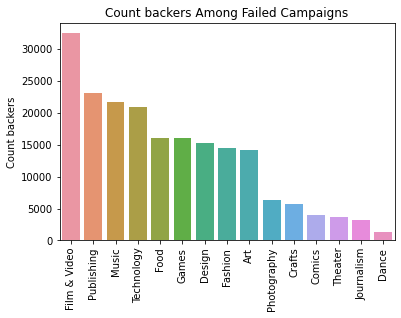

In [13]:
failed = new_df.loc[(new_df.state == 'failed')]
groupby_main_category = failed.groupby(['main_category']).count()
count_value= pd.DataFrame(groupby_main_category['backers']).reset_index()
count_ord=count_value.sort_values(by="backers",ascending=False)

x=count_value.main_category
y=count_value['backers']
figz=sns.barplot(x="main_category", y="backers" , data=count_ord)

figz.set(xlabel='', ylabel='Count backers')
figz.set_xticklabels(figz.get_xticklabels(),rotation=90)
figz.set_title('Count backers Among Failed Campaigns')

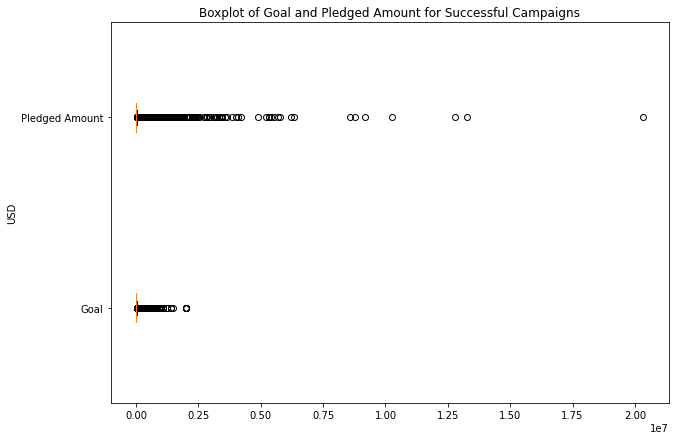

In [14]:
fig = plt.figure(figsize =(10, 7))
data_values =new_df.loc[(new_df.state == 'successful')]
data = [data_values['goal'], data_values['usd pledged']]
plt.boxplot(data, vert=False)
plt.title('Boxplot of Goal and Pledged Amount for Successful Campaigns')
plt.yticks(ticks=[1,2],labels=['Goal', 'Pledged Amount'])
plt.ylabel('USD')
plt.show()

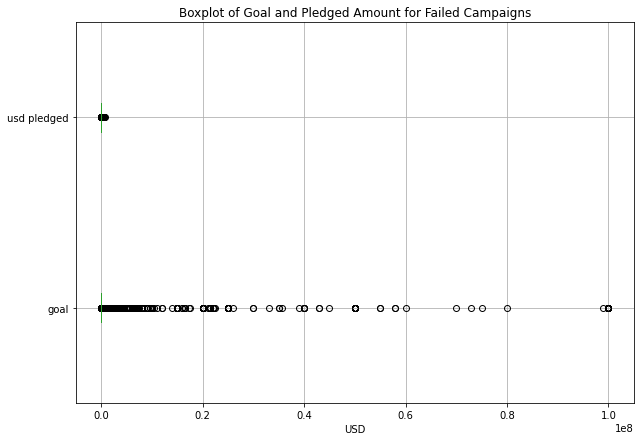

In [15]:
fig = plt.figure(figsize =(10, 7))
data_values =new_df.loc[(new_df.state == 'failed')]
# data = [data_values['goal'], data_values['usd pledged']]

data_values.boxplot(column=['goal', 'usd pledged'], vert=False)
# plt.boxplot(data)
plt.title('Boxplot of Goal and Pledged Amount for Failed Campaigns')
# plt.xticks([1, 2], ['Goal', 'Pledged Amount'])
plt.xlabel('USD')
plt.show()

Text(0.5, 0, 'Number of campaigns')

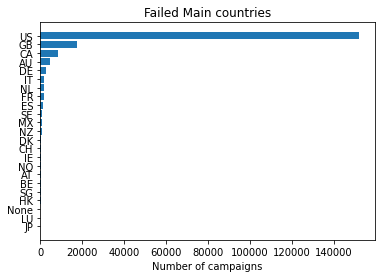

In [16]:
values = new_df.loc[new_df.state=='failed','country'].value_counts()
x = values.index.tolist()
y = values
plt.yticks(np.arange(len(x)),x)
plt.gca().invert_yaxis() 
plt.barh(np.arange(len(x)),y)
plt.title('Failed Main countries')
plt.xlabel('Number of campaigns')

Text(0.5, 0, 'Number of campaigns')

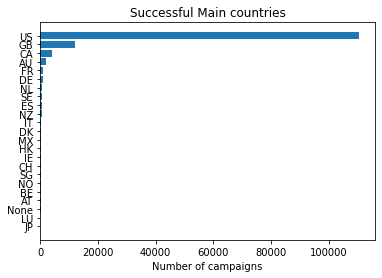

In [17]:
values = new_df.loc[new_df.state=='successful','country'].value_counts()
x = values.index.tolist()
y = values
plt.yticks(np.arange(len(x)),x)
plt.gca().invert_yaxis() 
plt.barh(np.arange(len(x)),y)
plt.title('Successful Main countries')
plt.xlabel('Number of campaigns')

Text(0.5, 0, 'Number of campaigns')

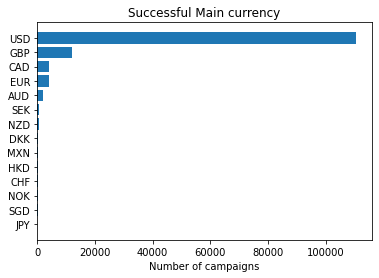

In [18]:
values = new_df.loc[new_df.state=='successful','currency'].value_counts()
x = values.index.tolist()
y = values
plt.yticks(np.arange(len(x)),x)
plt.gca().invert_yaxis() 
plt.barh(np.arange(len(x)),y)
plt.title('Successful Main currency')
plt.xlabel('Number of campaigns')

Text(0.5, 0, 'Number of campaigns')

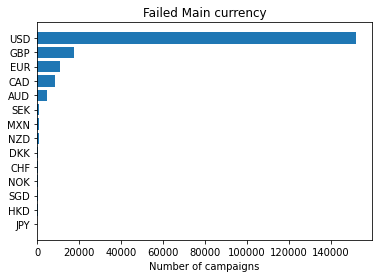

In [19]:
values = new_df.loc[new_df.state=='failed','currency'].value_counts()
x = values.index.tolist()
y = values
plt.yticks(np.arange(len(x)),x)
plt.gca().invert_yaxis() 
plt.barh(np.arange(len(x)),y)
plt.title('Failed Main currency')
plt.xlabel('Number of campaigns')

Text(0.5, 1.0, 'Goal')

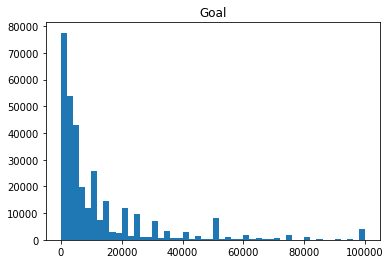

In [20]:
plt.hist(new_df['goal'],range=(0, 100000), bins=50)
plt.title("Goal")

In [21]:
successful = new_df.loc[(new_df.state == 'successful')]

Text(0.5, 1.0, 'successful Goal')

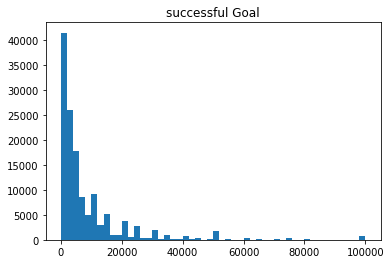

In [22]:
plt.hist( successful['goal'],range=(0, 100000), bins=50)
plt.title("successful Goal")

In [23]:
failed= new_df.loc[(new_df.state == 'failed')]

Text(0.5, 1.0, 'Failed Goal')

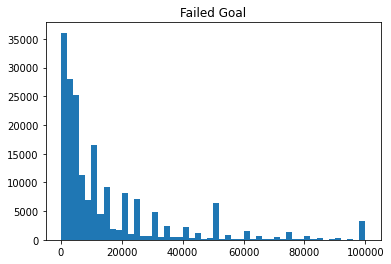

In [24]:
plt.hist( failed['goal'],range=(0, 100000), bins=50)
plt.title("Failed Goal")

Text(0.5, 1.0, 'usd pledged')

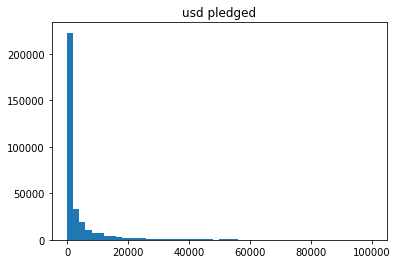

In [25]:
plt.hist(new_df['usd pledged'],range=(0, 100000), bins=50)
plt.title("usd pledged")

Text(0.5, 1.0, 'Failed usd pledged')

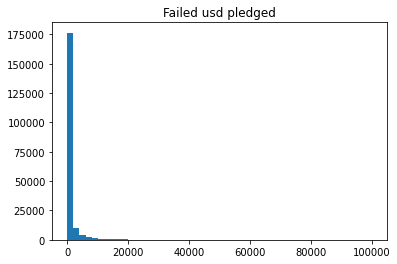

In [26]:
plt.hist( failed['usd pledged'],range=(0, 100000), bins=50)
plt.title("Failed usd pledged")

Text(0.5, 1.0, 'Successful usd pledged')

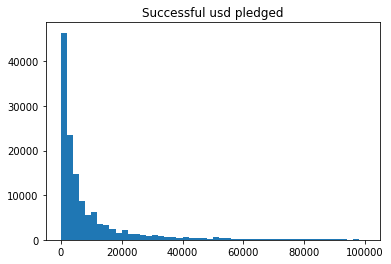

In [27]:
plt.hist( successful['usd pledged'],range=(0, 100000), bins=50)
plt.title("Successful usd pledged")

In [28]:
# Calculate a duration in days column
new_df['duration_days'] = (pd.to_datetime(new_df['deadline']) - pd.to_datetime(new_df['launched'])).dt.days

Text(0, 0.5, 'Count')

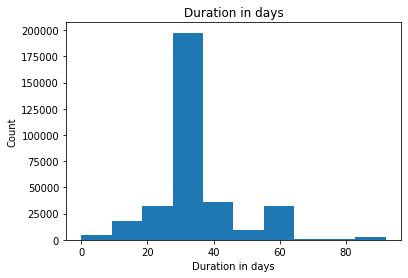

In [29]:
# Plot the distribution of duration_days
plt.hist(new_df['duration_days'])
plt.title("Duration in days")
plt.xlabel('Duration in days')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

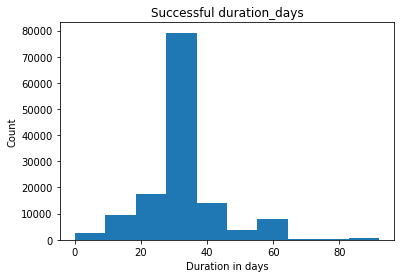

In [30]:
# Subset successful campaigns
successful = new_df.loc[new_df['state'] == 'successful']

# Plot the distribution of duration_days
plt.hist(successful['duration_days'])
plt.title("Successful duration_days")
plt.xlabel('Duration in days')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

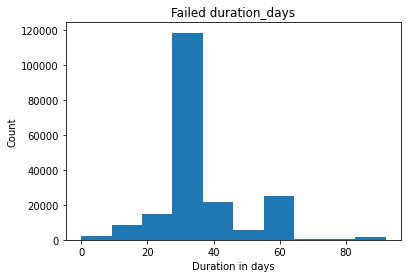

In [31]:
# Subset failed campaigns
failed = new_df.loc[new_df['state'] == 'failed']

# Plot the distribution of duration_days
plt.hist(failed['duration_days'])
plt.title("Failed duration_days")
plt.xlabel('Duration in days')
plt.ylabel('Count')

In [32]:
#
# ? How does the project duration affect the success rate of the projects?
successful_mean_duration = successful['duration_days'].mean()
failed_mean_duration = failed['duration_days'].mean()

print("The average duration for successful campaigns: " + str(successful_mean_duration) + " days")
print("The average duration for failed campaigns: " + str(failed_mean_duration) + " days")

The average duration for successful campaigns: 31.766247248256924 days
The average duration for failed campaigns: 34.86501142989496 days


<AxesSubplot:xlabel='goal', ylabel='main_category'>

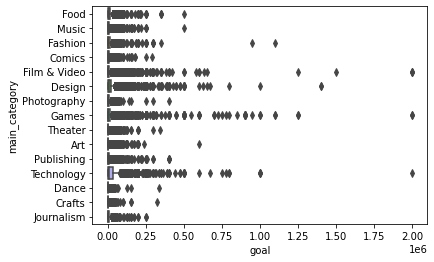

In [33]:
# What are the distribution and statistics of the funding goals and pledges for different project categories?
# Subset the successful projects
successful = new_df.loc[new_df['state'] == 'successful']

# Plot the boxplot
sns.boxplot(y='main_category', x='goal', data=successful, orient='h')

<AxesSubplot:xlabel='usd pledged', ylabel='main_category'>

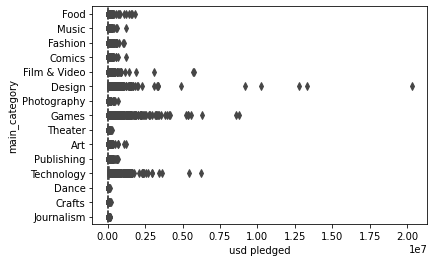

In [34]:
# Plot the boxplot
sns.boxplot(y='main_category', x='usd pledged', data=successful, orient='h')

In [35]:
# change 'state' column to 0 and 1
new_df['state'] = new_df['state'].replace('failed', 0)
new_df['state'] = new_df['state'].replace('successful', 1)

In [36]:
#How does the number of backers correlate with the project success?
corr = new_df[['state', 'backers']].corr(method='pearson')
print(corr)

            state   backers
state    1.000000  0.127688
backers  0.127688  1.000000


In [42]:
# Let's get the correlation between all the continuous variables
corr = new_df[['goal', 'pledged', 'backers', 'duration_days']].corr(method='pearson')
print(corr)

                   goal   pledged   backers  duration_days
goal           1.000000  0.007951  0.004713       0.023233
pledged        0.007951  1.000000  0.717707       0.006980
backers        0.004713  0.717707  1.000000      -0.000907
duration_days  0.023233  0.006980 -0.000907       1.000000


<AxesSubplot:xlabel='backers', ylabel='pledged'>

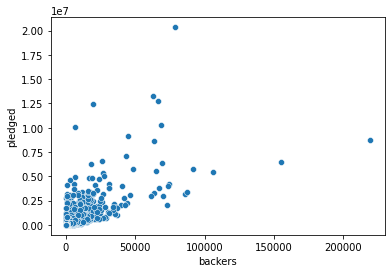

In [43]:
# Clearly there is a strong correlation between the number of backers and the pledged amount (0.71).
# Let's plot the relationship between the two variables.
sns.scatterplot(x='backers', y='pledged', data=new_df)

In [44]:
new_df.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'duration_days'],
      dtype='object')

In [58]:
# Let's attempt to get the relationship each of the categorical variables and the state of the project
# Will use the chi-square test to determine the relationship 
# & the Cramer's V test to determine the strength of the relationship

# calculate the chi-square test statistic and p-value for the main_category variable
chi2, pval, dof, expected = chi2_contingency(pd.crosstab(new_df['main_category'], new_df['state']))

# Define a function to calculate the Cramer's V test
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return p, np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))
# calculate the chi-square test statistic and p-value for the main category variable
p, cramer = cramers_v(new_df['main_category'], new_df['state'])
print('The p-value for the relationship between main_category and state is: ', p)
print('The Cramer\'s V value for the relationship between main_category and state is: ', cramer)
print('---------------------------------------------------------------------------------------')

# calculate the chi-square test statistic and p-value for the category variable
p, cramer = cramers_v(new_df['category'], new_df['state'])
print('The p-value for the relationship between category and currency is: ', p)
print('The Cramer\'s V value for the relationship between main_category and currency is: ', cramer)
print('---------------------------------------------------------------------------------------')

# calculate the chi-square test statistic and p-value for the currency variable
p, cramer = cramers_v(new_df['currency'], new_df['state'])
print('The p-value for the relationship between currency and state is: ', p)
print('The Cramer\'s V value for the relationship between currency and state is: ', cramer)
print('---------------------------------------------------------------------------------------')

# calculate the chi-square test statistic and p-value for the country variable
p, cramer = cramers_v(new_df['country'], new_df['state'])
print('The p-value for the relationship between country and state is: ', p)
print('The Cramer\'s V value for the relationship between country and state is: ', cramer)

The p-value for the relationship between main_category and state is:  0.0
The Cramer's V value for the relationship between main_category and state is:  0.2152588185314189
---------------------------------------------------------------------------------------
The p-value for the relationship between category and currency is:  0.0
The Cramer's V value for the relationship between main_category and currency is:  0.30726932403922935
---------------------------------------------------------------------------------------
The p-value for the relationship between currency and state is:  0.0
The Cramer's V value for the relationship between currency and state is:  0.07896387065371874
---------------------------------------------------------------------------------------
The p-value for the relationship between country and state is:  0.0
The Cramer's V value for the relationship between country and state is:  0.08209818448640158


In [66]:
# It's clear that only the category & currency variables
# have a somewhat relevant relationship with the state of the project.

# Also, all the variables are statistically related to the state of the project. (p-value < 0.05)
# However most those relationships are weak (Cramer's V < 0.1) (i.e., not relevant or practical)

# Now let's get the relationship between the state & each of the continuous variables

# ! 1 - using logistic regression
continous_variables = ['goal', 'pledged', 'backers', 'duration_days']
for var in continous_variables:
    group1 = new_df[new_df['state'] == 0][var]
    group2 = new_df[new_df['state'] == 1][var]

    # Perform the t-test
    tstat, pval = stats.ttest_ind(group1, group2)

    # Print the t-statistic and p-value
    print('t-statistic for the difference in mean between successful and failed campaigns for variable {}:'.format(var), tstat)
    print('p-value for the difference in mean between successful and failed campaigns for variable {}:'.format(var), pval)
    print('---------------------------------------------------------------------------------------')

t-statistic for the difference in mean between successful and failed campaigns for variable goal: 14.664811973596986
p-value for the difference in mean between successful and failed campaigns for variable goal: 1.1216153819252143e-48
---------------------------------------------------------------------------------------
t-statistic for the difference in mean between successful and failed campaigns for variable pledged: -64.77014283735008
p-value for the difference in mean between successful and failed campaigns for variable pledged: 0.0
---------------------------------------------------------------------------------------
t-statistic for the difference in mean between successful and failed campaigns for variable backers: -74.4506211954454
p-value for the difference in mean between successful and failed campaigns for variable backers: 0.0
---------------------------------------------------------------------------------------
t-statistic for the difference in mean between successful and